Part1: Acquire power data (source) for at least 10 days and not more than 40 days. Load the data into a Jupyter Notebook. Create two bar graphs of the power consumption per hour. One bar graph has 24 bars (average of power consumption per hour for the chosen days); one bar graph has 24*(number of days) bars (power consumption for every hour in all the days). Submit the .ipynb file containing the analysis and the generated pictures.

Average of Power Consumption per hour: 2020-03-01 to 2020-03-10


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
demand(MV),331299.2,331130.9,322755.4,315492.6,310633.8,316621.2,359372.7,406051.7,421530.4,425580.4,...,414838.9,423649.2,448829.0,479216.2,500118.9,457891.4,410501.4,410442.6,372460.5,336607.2


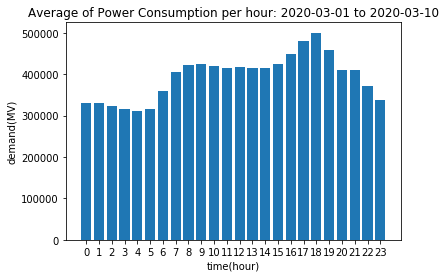

Power Consumption per hour: 2020-03-01 to 2020-03-10


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
20200301,314475.0,317313.0,304891.0,297060.0,290948.0,292635.0,301094.0,308119.0,311198.0,321032.0,...,339804.0,354412.0,393823.0,438703.0,465356.0,458375.0,436691.0,399192.0,361930.0,328369.0
20200302,321383.0,318491.0,312277.0,306707.0,306186.0,323314.0,389503.0,448494.0,460935.0,456423.0,...,419761.0,436107.0,462983.0,495710.0,524514.0,513640.0,480935.0,432541.0,378979.0,346432.0
20200303,344066.0,341398.0,332643.0,329392.0,327010.0,330858.0,386811.0,450118.0,468411.0,465006.0,...,436806.0,448066.0,473990.0,506401.0,533309.0,527611.0,505613.0,457665.0,406039.0,373013.0
20200304,368240.0,368512.0,361036.0,351447.0,346686.0,347186.0,405708.0,469220.0,484500.0,485227.0,...,487094.0,496389.0,513709.0,532127.0,546993.0,534061.0,512314.0,464782.0,414744.0,383195.0
20200305,383197.0,382457.0,372942.0,363018.0,356383.0,361931.0,408710.0,471374.0,498635.0,509303.0,...,496806.0,499339.0,517473.0,539333.0,554234.0,227349.0,0.0,377928.0,410227.0,366134.0
20200306,355860.0,356228.0,348662.0,344491.0,339709.0,345125.0,402821.0,461908.0,470368.0,463941.0,...,419046.0,426246.0,454845.0,488583.0,517044.0,504748.0,473281.0,431081.0,387787.0,348643.0
20200307,335404.0,328895.0,313309.0,301540.0,292014.0,297859.0,315567.0,343224.0,375517.0,392833.0,...,368610.0,371255.0,383830.0,410334.0,432459.0,417138.0,384659.0,352116.0,319121.0,290138.0
20200308,288732.0,295976.0,291101.0,280398.0,278908.0,276665.0,284783.0,293183.0,299926.0,313733.0,...,332142.0,346907.0,381245.0,421049.0,446905.0,439900.0,414073.0,381393.0,341958.0,304053.0
20200309,296123.0,295747.0,290790.0,285221.0,281178.0,295487.0,357462.0,414863.0,431014.0,429277.0,...,443864.0,452760.0,478650.0,502154.0,500744.0,481973.0,448093.0,398708.0,347548.0,307914.0
20200310,305512.0,306292.0,299903.0,295652.0,287316.0,295152.0,341268.0,400014.0,414800.0,419029.0,...,404456.0,405011.0,427742.0,457768.0,479631.0,474119.0,449355.0,409020.0,356272.0,318181.0


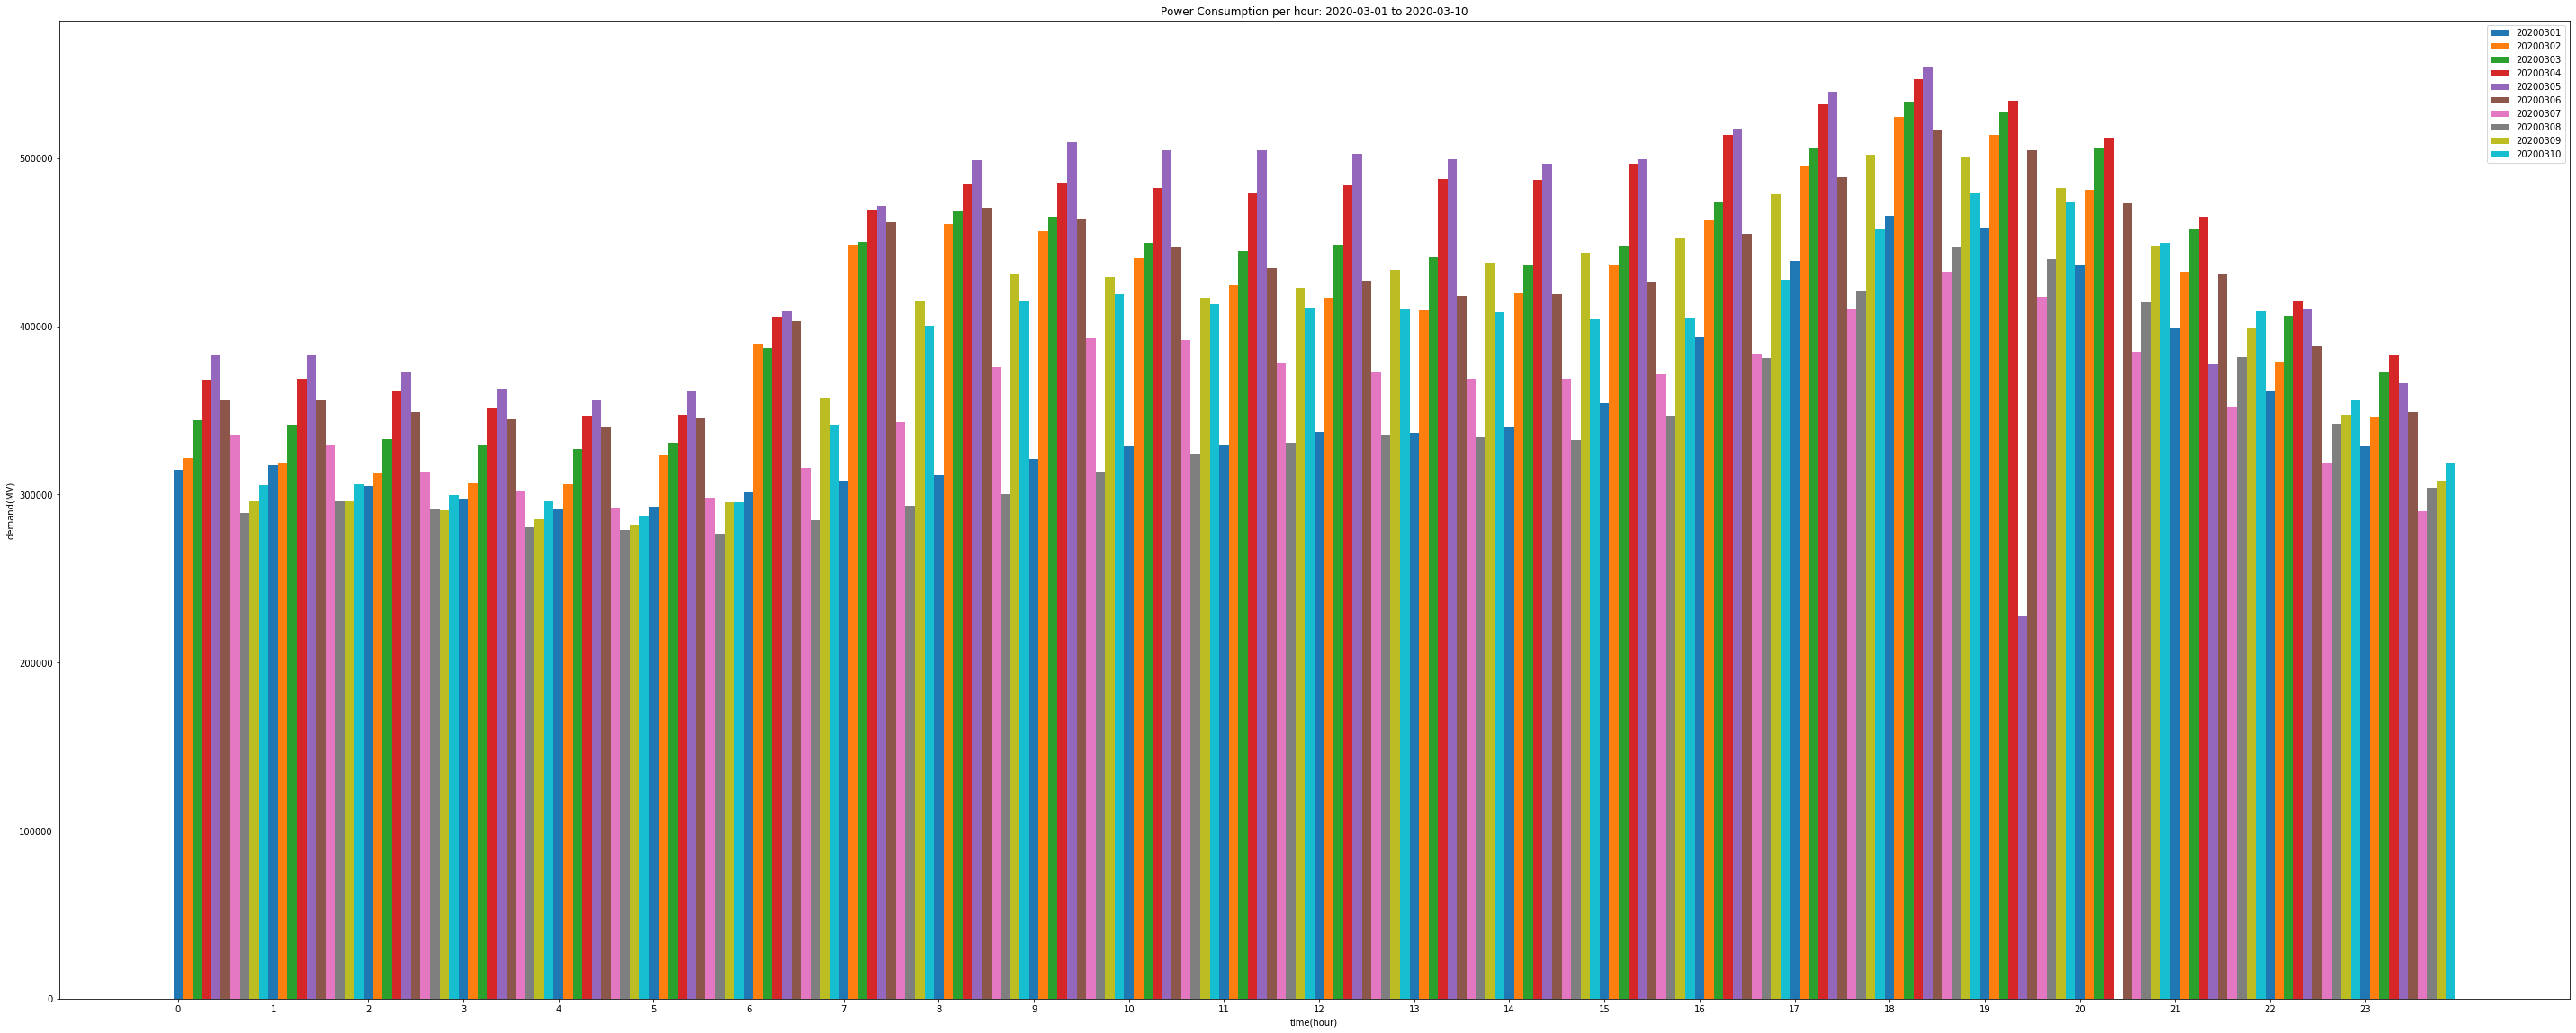

In [6]:
import matplotlib.pyplot as plt
import pandas
from xml.dom import minidom
import numpy as np

def bars_24():
    data = pandas.read_csv('RollingSystemDemand_20200325_2316.csv')

    df = pandas.DataFrame(data)
    data["HDR"]= data["HDR"].astype(str) 
    data_list = dict(zip(df['HDR'].str[4:12], df['ROLLING SYSTEM DEMAND']))
    hour_list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    date_list=[]
    
    # get dates
    for i in df['HDR'].str[:8]:
        if i not in date_list:
            if len(i) == 8:
                date_list.append(i)
                
    # compute sum of power consumption for each hour 
    demand_24_hours_list = []
    for i in range(0, 24):
        demand_24_hours_list.append(sum([value for key, value in data_list.items() 
                                         if str(i).zfill(2) in key.lower()[4:6]])/len(date_list))

    year = df['HDR'].str[:4][0]
    start_date = year + '-' + df['HDR'].str[4:6][0] + '-' + df['HDR'].str[6:8][0]
    end_date = year + '-' + df['HDR'].str[4:6][-2] + '-' + df['HDR'].str[6:8][-2]
    title = 'Average of Power Consumption per hour: ' + start_date + ' to ' + end_date
    print(title)
    df2 = pandas.DataFrame([demand_24_hours_list], index = ['demand(MV)']) 
    display(df2)
    
    fig, ax = plt.subplots()
    index = np.arange(len(demand_24_hours_list))
    plt.bar(index, demand_24_hours_list)
    plt.title(title)
    plt.xlabel('time(hour)')
    plt.ylabel('demand(MV)')
    plt.xticks(index, hour_list)
    plt.show()

def bars_24_times_days():
    data = pandas.read_csv('RollingSystemDemand_20200325_2316.csv')

    df = pandas.DataFrame(data)
    data["HDR"]= data["HDR"].astype(str) 
    data_list = dict(zip(df['HDR'], df['ROLLING SYSTEM DEMAND']))
    hour_list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    date_list=[]
    
    # get dates
    for i in df['HDR'].str[:8]:
        if i not in date_list:
            if len(i) == 8:
                date_list.append(i)
    
    # get 24 hours power consumption for each date
    demand_all_date_list = []
    for date in date_list:
        demand_24_hours_list = []
        for i in range(0, 24):
            demand_24_hours_list.append(sum([value for key, value in data_list.items() 
                                             if (date + str(i).zfill(2)) in key.lower()[:10]]))
        demand_all_date_list.append(demand_24_hours_list)

    year = df['HDR'].str[:4][0]
    start_date = year + '-' + df['HDR'].str[4:6][0] + '-' + df['HDR'].str[6:8][0]
    end_date = year + '-' + df['HDR'].str[4:6][-2] + '-' + df['HDR'].str[6:8][-2]
    title = 'Power Consumption per hour: ' + start_date + ' to ' + end_date
    print(title)
    df2 = pandas.DataFrame(demand_all_date_list, index=date_list) 
    display(df2)
    
    fig, ax = plt.subplots()
    index = np.arange(len(hour_list))
    prop_iter = iter(plt.rcParams['axes.prop_cycle'])
    fig.set_size_inches(50, 20)
    bar_width = 0.1

    for i in range(len(demand_all_date_list)):
        plt.bar(index+(bar_width*i), demand_all_date_list[i], bar_width,color=next(prop_iter)['color'], label=date_list[i])

    plt.title(title)
    plt.xlabel('time(hour)')
    plt.ylabel('demand(MV)')
    plt.xticks(index, hour_list)
    plt.legend()
    plt.show()
    
if __name__ == '__main__':        
    bars_24()
    bars_24_times_days()

Part 2: Simulate a fair die and a biased 6-sided die. The biased die has probabilities {0.15, 0.15, 0.15, 0.15, 0.15, 0.25}. Create a visualization that compares outcomes of multiple rolls of a fair die and this biased die. You can use a single visualization or multiple visualizations to demonstrate the difference in outcomes for the dice. The user of your notebook should be able to alter the number of simulations as an argument to a function.

Enter number of rolls:1000


,Roll Type,1,2,3,4,5,6
0,fair,158,166,155,186,180,155
1,biased,144,158,144,152,173,229


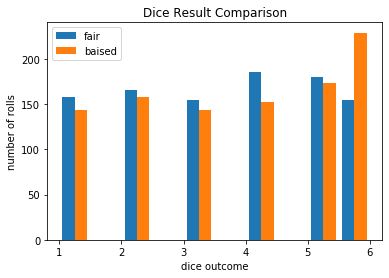

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas

def dice_simulate(num_run):
    fair_dice_result = []
    biased_dice_result = []
    for i in range(num_run):  
        fair_dice = random.randint(1,6)
        fair_dice_result.append(fair_dice)
        
        dice_list = [1,2,3,4,5,6]
        biased_dice = np.random.choice(dice_list, 1, p=[0.15, 0.15, 0.15, 0.15, 0.15, 0.25])
        biased_dice_result.append(biased_dice[0])
    
    
    df = pandas.DataFrame([{'Roll Type':'fair','1':fair_dice_result.count(1),'2':fair_dice_result.count(2),
                           '3':fair_dice_result.count(3),'4':fair_dice_result.count(4),
                           '5':fair_dice_result.count(5),'6':fair_dice_result.count(6)},
                            {'Roll Type':'biased','1':biased_dice_result.count(1),'2':biased_dice_result.count(2),
                           '3':biased_dice_result.count(3),'4':biased_dice_result.count(4),
                           '5':biased_dice_result.count(5),'6':biased_dice_result.count(6)}])
    display(df)
    plt.title('Dice Result Comparison')
    plt.xlabel('dice outcome')
    plt.ylabel('number of rolls')
    _=plt.hist([fair_dice_result, biased_dice_result], label=['fair', 'baised'])
    plt.legend()
    plt.show()
    
if __name__ == '__main__':        
    num_run = input("Enter number of rolls:")
    dice_simulate(int(num_run))